In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
import numpy as np

X, y = mnist['data'], mnist['target'].astype(np.uint8)

In [3]:
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
from math import sqrt

sqrt(X.shape[1])

28.0

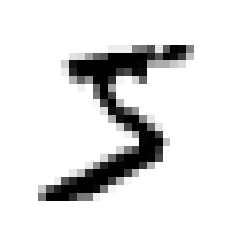

5

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

x = X[0]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()
y[0]

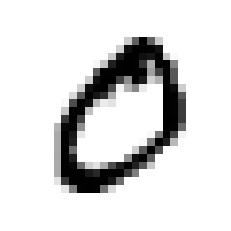

0

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt

x = X[1]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()
y[1]

In [17]:
partition = 60000

X_train, X_test, y_train, y_test = X[:partition], X[partition:], y[:partition], y[partition:]

In [18]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [19]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

In [20]:
is_5_y_train = (y_train == 5)
is_5_y_train

array([ True, False, False, ...,  True, False, False])

In [21]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, is_5_y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

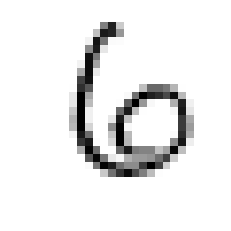

array([False])

In [30]:
x = X_test[100]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

sgd_classifier.predict([x])

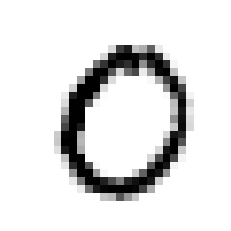

array([False])

In [31]:
x = X_test[101]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

sgd_classifier.predict([x])

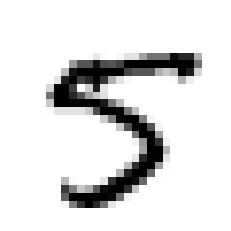

array([ True])

In [29]:
x = X_test[102]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

sgd_classifier.predict([x])

In [33]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_classifier, X_train, is_5_y_train, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])